Initialization

In [728]:
from matplotlib.pyplot import *
from numpy import *
from sklearn.datasets import load_wine as load
data = load()
y,k = data.target,len(data.target_names)
d = 2 #number of dimensions in reduced data

# PCA

In [729]:
def PCA(X,d):
    # Translating and scaling data to get standard guassian distribution
    X = X - mean(X,axis=0)
    X = X / sqrt(var(X,axis=0))
    # numpy stuff..
    XT = X[:,newaxis,:]
    X = X[:,:,newaxis]
    # Eigenvalue decomposition of covariance matrix E(X*XT) to find R
    lam,R = linalg.eig(mean(X*XT,axis=0))
    # Dimension reduction to d dimensions
    idx = lam.argsort()[:-d-1:-1]
    lam = lam[idx]
    R = R[:,idx]
    # Applying the rotation matrix (but with 2 rows only) to data, to get data for new random variables
    return (R.T @ X)[:,:,0]

In [730]:
X = PCA(data.data,d)

Result of PCA

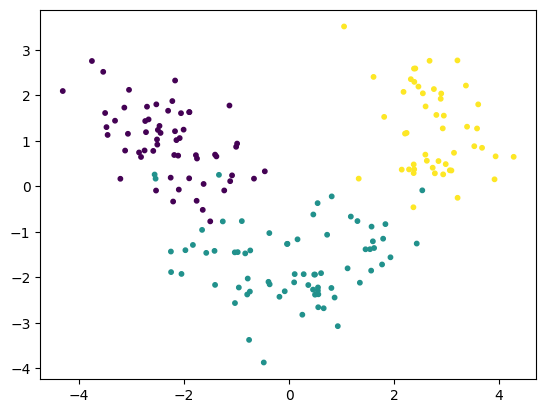

In [731]:
#dependence on first 2 new random variables
scatter(X[:,0],X[:,1],c=y,s=10)
show()

# Guassian Naive Bayes

In [732]:
for d in range(2,6):
    X = PCA(data.data,d)
    mu = []
    sig2 = []
    for i in range(k):
        mu.append(mean(X[y==i],axis=0))
        sig2.append(var(X[y==i],axis=0))
    correct = 0
    incorrect = 0
    for j in range(X.shape[0]):
        x = X[j]
        guess = None
        gp = 0
        for i in range(k):
            p = prod(exp(-((x-mu[i])**2)/(2*sig2[i]))*(2*pi*sig2[i])**(-0.5))
            p *= sum(y==i)
            if p > gp :
                guess = i
                gp = p
        if(guess==None):
            pass
        elif(guess==y[j]):
            correct += 1
        else:
            incorrect += 1
    print("Accuracy :",round(100*correct/(correct + incorrect),2),"%")
    print("using",d,"dimensions \n")

Accuracy : 96.63 %
using 2 dimensions 

Accuracy : 97.19 %
using 3 dimensions 

Accuracy : 96.07 %
using 4 dimensions 

Accuracy : 97.75 %
using 5 dimensions 



# K-Means

In [733]:
def kmean(data,k,N=100,C=[]):
    if len(C) == 0:
        C = data[random.randint(0,len(data),k)]
    data2d = data[:,newaxis,:]
    for _ in range(N):
        dist = linalg.norm(data2d - C,axis=-1)
        labels = argmin(dist,axis=1)
        for c in range(k):
            C[c] = mean(data[labels==c],axis=0)
    return C,labels

Clusters

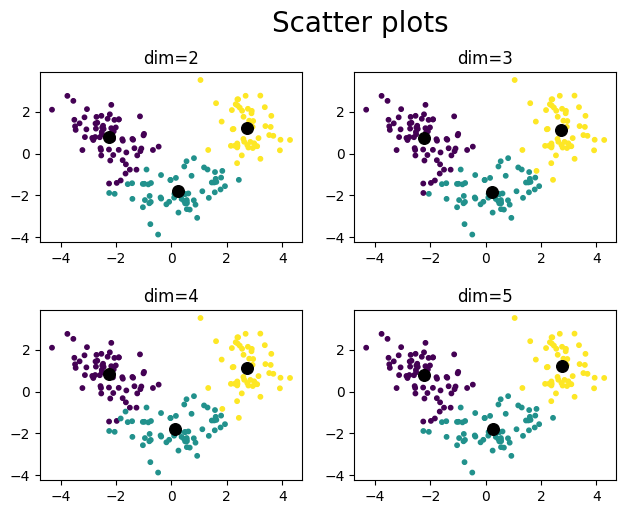

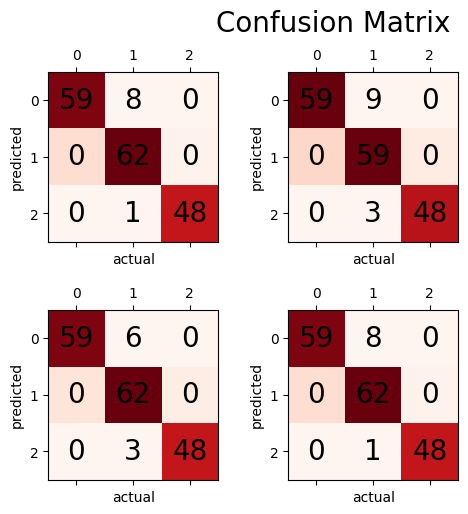

In [734]:
f1 = figure()
f2 = figure()
for d in range(2,6):
    ax = f1.add_subplot(2,2,d-1)
    X = PCA(data.data,d)
    C = []
    for i in range(k):
        clus = X[y==i]
        C.append(clus[random.randint(0,clus.shape[0])])
    C,labels = kmean(X,k,100,array(C))
    ax.scatter(X[:,0],X[:,1],c=labels,s=10)
    ax.scatter(C[:,0],C[:,1],c="black",s=70)
    ax.set_title(f"dim={d}")
    ax = f2.add_subplot(2,2,d-1)
    M = zeros((k,k))
    for i in range(len(y)):
        M[y[i]][labels[i]] += 1
    ax.matshow(M,cmap='Reds')
    for i in range(k):
        for j in range(k):
            ax.text((i+0.0),(j+0.0),str(int(M[i][j])),size=20,va='center',ha='center')
    ax.set_xlabel("actual")
    ax.set_ylabel("predicted")
f1.subplots_adjust(0.0,0.0,0.9,0.85,0.2,0.4)
f2.subplots_adjust(0.0,0.0,0.75,0.85,0.0,0.4)
f1.suptitle("Scatter plots",size=20)
f2.suptitle("Confusion Matrix",size=20)
show()